In [1]:
%pip install -r requirements.txt

  Using cached Pint-0.20.1-py3-none-any.whl (269 kB)
  Using cached python_gnupg-0.5.0-py2.py3-none-any.whl (18 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
  Using cached fooddatacentral-1.0.9-py3-none-any.whl
  Attempting uninstall: pint
    Found existing installation: Pint 0.17
    Uninstalling Pint-0.17:
      Successfully uninstalled Pint-0.17
Note: you may need to restart the kernel to use updated packages.


In [2]:
import fooddatacentral as fdc
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
from eep153_tools.sheets import read_sheets

apikey = "Dsfa8UjD5QX9KPxm7jukDcXyC4etFnZtXL1u7ujA" 

In [4]:
RDIs = read_sheets('https://docs.google.com/spreadsheets/d/1y95IsQ4HKspPW3HHDtH7QMtlDA66IUsCHJLutVL-MMc/')

bmin = RDIs['diet_minimums'].set_index('Nutrition')

# Drop string describing source
bmin = bmin.drop('Source',axis=1)
bmin

Key available for students@eep153.iam.gserviceaccount.com.


,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Magnesium, Mg",80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


### RDI Finder Function

In [5]:
# inputs: age as a integer, sex as "F" for female or "M" for male 

def rdi_finder(age, sex): 
    if age < 4: 
        bmin.iloc[:, 0]
    if sex == "F": 
        if age >= 4 and age <= 8:
            return bmin.iloc[:, 1]
        if age >= 9 and age <= 13:
            return bmin.iloc[:, 3]
        if age >= 14 and age <= 18: 
            return bmin.iloc[:, 5]
        if age >= 19 and age <= 30: 
            return bmin.iloc[:, 7]
        if age >= 31 and age <= 50: 
            return bmin.iloc[:, 9]
        else: 
            return bmin.iloc[:,11]
    else: 
        if age >= 4 and age <= 8:
            return bmin.iloc[:, 2]
        if age >= 9 and age <= 13:
            return bmin.iloc[:, 4]
        if age >= 14 and age <= 18: 
            return bmin.iloc[:, 6]
        if age >= 19 and age <= 30: 
            return bmin.iloc[:, 8]
        if age >= 31 and age <= 50: 
            return bmin.iloc[:, 10]
        else: 
            return bmin.iloc[:,12]
normal_male_21 = rdi_finder(21, "M")    

In [6]:
df_comparison = pd.DataFrame(normal_male_21)
df_comparison.rename(columns = {"M 19-30": "Male Student"}, inplace = True)
# Adding football athlete requirements 
football = [4000, 192, 35, 400, 1300, 680, 15, 400, 20, 1250, 4700, 1.7, 1.2, 1200, 2.5, 1.6, 200, 15, 120, 15]
df_comparison["Football Athlete"] = football
df_comparison

,Male Student,Football Athlete
Nutrition,,
Energy,2400.0,4000.0
Protein,56.0,192.0
"Fiber, total dietary",33.6,35.0
"Folate, DFE",400.0,400.0
"Calcium, Ca",1000.0,1300.0
"Carbohydrate, by difference",130.0,680.0
"Iron, Fe",8.0,15.0
"Magnesium, Mg",400.0,400.0
Niacin,16.0,20.0


In [7]:
bmax_normal = RDIs['diet_maximums'].set_index('Nutrition')

# Drop string describing source
bmax = bmax_normal.drop('Source',axis=1)
bmax = pd.DataFrame(bmax_normal.iloc[:,9])
bmax.rename(columns = {"M 19-30": "Male Student"}, inplace = True)
bmax["Football Athlete"] = [5000, 7000]
bmax

,Male Student,Football Athlete
Nutrition,,
"Sodium, Na",2300,5000
Energy,3100,7000


In [8]:
#Our Grocery List 
df_grocery = read_sheets("https://docs.google.com/spreadsheets/d/1IAsnG9HXwOc3vbsPXCbWgJp1WFO3Zn72p0e1l6t8BCc/edit#gid=1147509308", sheet = "Normal")

df_grocery = df_grocery.set_index('Food')

df_grocery

Key available for students@eep153.iam.gserviceaccount.com.


,Links,Food Type,Price,Quantity,Units,Unit Price,FDC,https://fdc.nal.usda.gov/fdc-app.html#/food-details/2258586/nutrients
Food,,,,,,,,
Salt,https://www.traderjoes.com/home/products/pdp/s...,Condiment,1.99,3.880,oz,0.790000,746775,NaN
Yogurt,https://www.traderjoes.com/home/products/pdp/n...,Dairy,0.99,5.300,oz,0.186792,330137,NaN
String Cheese,,Dairy,2.99,12.000,oz,0.249167,2341127,NaN
Butter,,Dairy,4.69,1.000,lbs,4.690000,789828,NaN
Lentils,https://www.traderjoes.com/home/products/pdp/s...,Dairy,3.29,17.360,oz,0.189516,172420,NaN
Olive oil,,Fat,6.99,0.265,gallon,26.377358,748608,NaN
Apple,https://www.traderjoes.com/home/products/pdp/h...,Fruit,1.29,6.000,oz,0.215000,1750340,NaN
Bananas,,Fruit,0.25,4.000,oz,0.062500,1105314,NaN
Strawberries,https://www.traderjoes.com/home/products/pdp/s...,Fruit,7.99,2.000,lbs,3.995000,2346409,NaN


In [9]:
#Changing the units to hectograms and deciliter:
df_grocery['FDC Quantity'] = df_grocery[['Quantity','Units']].T.apply(lambda x : fdc.units(x['Quantity'],x['Units']))
df_grocery['FDC Price'] = df_grocery['Price']/df_grocery['FDC Quantity']
df_grocery.dropna(how='any') # Drop food with any missing data
df_grocery

/opt/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1990: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


,Links,Food Type,Price,Quantity,Units,Unit Price,FDC,https://fdc.nal.usda.gov/fdc-app.html#/food-details/2258586/nutrients,FDC Quantity,FDC Price
Food,,,,,,,,,,
Salt,https://www.traderjoes.com/home/products/pdp/s...,Condiment,1.99,3.880,oz,0.790000,746775,NaN,1.09996149725 hectogram,1.809154234011985 / hectogram
Yogurt,https://www.traderjoes.com/home/products/pdp/n...,Dairy,0.99,5.300,oz,0.186792,330137,NaN,1.502524725625 hectogram,0.6588909873600869 / hectogram
String Cheese,,Dairy,2.99,12.000,oz,0.249167,2341127,NaN,3.401942775 hectogram,0.8789095519103787 / hectogram
Butter,,Dairy,4.69,1.000,lbs,4.690000,789828,NaN,4.535923700000001 hectogram,1.0339680096470758 / hectogram
Lentils,https://www.traderjoes.com/home/products/pdp/s...,Dairy,3.29,17.360,oz,0.189516,172420,NaN,4.9214772145 hectogram,0.6684984724315642 / hectogram
Olive oil,,Fat,6.99,0.265,gallon,26.377358,748608,NaN,10.031341227599997 deciliter,0.6968160928239464 / deciliter
Apple,https://www.traderjoes.com/home/products/pdp/h...,Fruit,1.29,6.000,oz,0.215000,1750340,NaN,1.7009713875 hectogram,0.7583901819159788 / hectogram
Bananas,,Fruit,0.25,4.000,oz,0.062500,1105314,NaN,1.1339809250000001 hectogram,0.22046226218487755 / hectogram
Strawberries,https://www.traderjoes.com/home/products/pdp/s...,Fruit,7.99,2.000,lbs,3.995000,2346409,NaN,9.071847400000001 hectogram,0.8807467374285859 / hectogram


In [10]:
import warnings

D = {}
count = 0
for food in  df_grocery.index:
    try:
        FDC = df_grocery.loc[df_grocery.index==food,:].FDC.values[0]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
        print(food)
    except AttributeError:
        warnings.warn(f"Couldn't find FDC Code {FDC} for food {food}." % (food,FDC))

D = pd.DataFrame(D,dtype=float)

D

Salt
Yogurt
String Cheese
Butter 
Lentils
Olive oil 
Apple
Bananas
Strawberries
Rice
Pasta
Oatmeal
Whole-Grain Bread
Quinoa
Chicken Breast
Eggs
Ground Beef
Broccoli
Carrots
Red Bell Pepper
Potatoes
Black Beans
Peanut Butter
Spinach


,Salt,Yogurt,String Cheese,Butter,Lentils,Olive oil,Apple,Bananas,Strawberries,Rice,...,Chicken Breast,Eggs,Ground Beef,Broccoli,Carrots,Red Bell Pepper,Potatoes,Black Beans,Peanut Butter,Spinach
Alanine,NaN,0.350,NaN,NaN,1.029,NaN,NaN,NaN,NaN,NaN,...,NaN,0.714,NaN,0.104,NaN,NaN,NaN,NaN,1.160,NaN
"Alcohol, ethyl",NaN,NaN,0.0,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amino acids,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN
Arginine,NaN,0.363,NaN,NaN,1.903,NaN,NaN,NaN,NaN,NaN,...,NaN,0.691,NaN,0.191,NaN,NaN,NaN,NaN,3.323,NaN
Ash,99.0,0.720,NaN,NaN,2.710,NaN,0.4279,0.7,0.345,0.22,...,1.19,0.650,1.22,0.830,0.7206,0.3956,0.985,NaN,2.771,1.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cis-Lutein/Zeaxanthin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
cis-Lycopene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cis-beta-Carotene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trans-Lycopene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Find minimum prices: 
# To use minimum price observed
Prices = df_grocery.groupby('Food')['FDC Price'].min()

Prices
#df_grocery.head()

p = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = p.index.intersection(D.columns)
p = p[use]

p

Apple                0.758390
Bananas              0.220462
Black Beans          0.248056
Broccoli             0.878910
Butter               1.033968
Carrots              0.219360
Chicken Breast       1.541031
Eggs                 0.742560
Ground Beef          1.100107
Lentils              0.668498
Oatmeal              0.712629
Olive oil            0.696816
Pasta                0.220462
Peanut Butter        0.504859
Potatoes             0.464440
Quinoa               0.879644
Red Bell Pepper      1.025884
Rice                 0.219727
Salt                 1.809154
Spinach              1.054300
Strawberries         0.880747
String Cheese        0.878910
Whole-Grain Bread    0.319069
Yogurt               0.658891
Name: FDC Price, dtype: float64

In [12]:
# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[p.index].fillna(0)

In [13]:
#For the Regular Male 
bmin_reg = df_comparison.drop("Football Athlete", axis =1)
bmax_reg = bmax.drop("Football Athlete", axis =1)

bmin_fb = df_comparison.drop("Male Student", axis =1)
bmax_fb = bmax.drop("Male Student", axis =1)

In [14]:
# Drop rows of A that we don't have constraints for.
Amin_reg = Aall.loc[bmin_reg.index]
Amax_reg = Aall.loc[bmax_reg.index]

Amin_fb = Aall.loc[bmin_fb.index]
Amax_fb = Aall.loc[bmax_fb.index]

# Maximum requirements involve multiplying constraint by -1 to make <=.
A_reg = pd.concat([Amin_reg,-Amax_reg])
A_fb = pd.concat([Amin_fb,-Amax_fb])

A_reg

,Apple,Bananas,Black Beans,Broccoli,Butter,Carrots,Chicken Breast,Eggs,Ground Beef,Lentils,...,Potatoes,Quinoa,Red Bell Pepper,Rice,Salt,Spinach,Strawberries,String Cheese,Whole-Grain Bread,Yogurt
Nutrition,,,,,,,,,,,,,,,,,,,,,
Energy,0.000000,408.000,0.00,132.000,0.00,0.00000,695.000,231.000,735.00,1473.000,...,0.00000,1539.000,0.000000,1500.000,0.0,0.000000,0.000000,280.00,1108.000,256.000
Protein,0.148438,0.740,24.40,2.570,0.00,0.94125,32.100,10.700,27.70,24.630,...,2.27375,14.120,0.895625,6.690,0.0,2.851875,0.640625,27.50,13.360,10.300
"Fiber, total dietary",2.075000,1.700,4.20,2.400,0.00,3.09500,0.000,0.000,0.00,10.700,...,0.00000,7.000,1.158000,0.000,0.0,1.558000,0.000000,0.00,7.400,0.000
"Folate, DFE",0.000000,0.000,0.00,0.000,0.00,0.00000,0.000,0.000,0.00,479.000,...,0.00000,184.000,0.000000,0.000,0.0,0.000000,0.000000,9.00,75.000,0.000
"Calcium, Ca",5.975000,5.000,191.00,46.000,14.00,30.48000,6.000,0.000,13.00,35.000,...,7.80100,47.000,6.361000,10.000,50.0,68.350000,16.900000,731.00,103.000,111.000
"Carbohydrate, by difference",15.651162,23.000,0.00,6.270,0.00,10.26755,0.000,2.360,0.00,63.350,...,17.77125,64.160,6.653175,80.100,0.0,2.406325,7.964375,3.10,43.340,3.640
"Iron, Fe",0.015000,0.000,5.34,0.690,0.03,0.15040,0.490,0.000,3.04,6.510,...,0.38350,4.570,0.353300,0.340,0.0,1.261000,0.255000,0.25,2.500,0.070
"Magnesium, Mg",4.670000,28.000,180.00,21.000,1.60,12.45000,32.000,0.000,13.70,47.000,...,25.64000,197.000,10.980000,21.200,0.0,92.860000,12.520000,26.00,78.000,10.700
Niacin,0.090630,0.662,0.00,0.639,0.00,1.40600,9.450,0.000,5.76,2.605,...,1.50100,1.520,1.024000,1.120,0.0,0.550600,0.000000,0.12,4.042,0.211


In [15]:
b_reg = pd.concat([bmin_reg,-bmax_reg]) # Note sign change for max constraints
b_fb = pd.concat([bmin_fb,-bmax_fb])

b_reg

,Male Student
Nutrition,
Energy,2400.0
Protein,56.0
"Fiber, total dietary",33.6
"Folate, DFE",400.0
"Calcium, Ca",1000.0
"Carbohydrate, by difference",130.0
"Iron, Fe",8.0
"Magnesium, Mg",400.0
Niacin,16.0


## Berkeley Male Student Minimum Cost Diet: 

In [16]:
from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

# Now solve problem!  (Note that the linear program solver we'll use assumes
# "less-than-or-equal" constraints.  We can switch back and forth by
# multiplying $A$ and $b$ by $-1$.)

result = lp(p, -A_reg, -b_reg, method='interior-point')

result

     con: array([], dtype=float64)
     fun: 7.03997047392426
 message: 'Optimization terminated successfully.'
     nit: 14
   slack: array([4.15161594e-08, 7.70781507e+01, 2.19373258e+00, 6.72368401e-08,
       2.78038533e-06, 1.93910170e+01, 9.34412988e+00, 5.08915716e+02,
       3.78199263e+01, 1.38370496e+03, 2.72367288e-07, 2.24886776e-12,
       2.24195730e-01, 6.32712727e-09, 1.34201539e-10, 1.32658853e+00,
       8.99293880e+01, 1.16104459e-10, 3.27925420e-09, 6.27047287e+00,
       1.13845786e+03, 7.00000000e+02])
  status: 0
 success: True
       x: array([8.64930227e-12, 1.80819280e-10, 1.18120788e-01, 1.12057677e+00,
       2.06293194e-11, 1.94747938e-10, 1.05287144e-11, 4.59896690e-11,
       4.14649854e-01, 7.42441859e-01, 1.17242572e-11, 0.00000000e+00,
       5.93261903e-11, 2.61853283e+00, 3.43085402e-11, 8.92175480e-11,
       1.52494922e-11, 6.24155588e-02, 2.45256969e-10, 2.79898624e+00,
       1.78077301e-11, 7.11221864e-01, 5.06258037e-01, 7.56028091e-11])

In [17]:
print(f"Cost of diet for Regular Male is ${result.fun:.2f} per day.")

Cost of diet for Regular Male is $7.04 per day.


In [18]:
diet = pd.Series(result.x,index=p.index)

print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])


You'll be eating (in 100s of grams or milliliters):
Black Beans          0.118121
Broccoli             1.120577
Ground Beef          0.414650
Lentils              0.742442
Peanut Butter        2.618533
Rice                 0.062416
Spinach              2.798986
String Cheese        0.711222
Whole-Grain Bread    0.506258
dtype: float64


In [19]:
tab = pd.DataFrame({"Outcome":np.abs(A_reg).dot(diet),"Recommendation":np.abs(b_reg.iloc[:,0])})
print("\nWith the following nutritional outcomes of interest:")
tab


With the following nutritional outcomes of interest:


,Outcome,Recommendation
Nutrition,,
Energy,2400.000000,2400.0
Protein,133.078151,56.0
"Fiber, total dietary",35.793733,33.6
"Folate, DFE",400.000000,400.0
"Calcium, Ca",1000.000003,1000.0
"Carbohydrate, by difference",149.391017,130.0
"Iron, Fe",17.344130,8.0
"Magnesium, Mg",908.915716,400.0
Niacin,53.819926,16.0


## Berkeley Football Athlete Minimum Cost Diet: 

In [20]:
tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

# Now solve problem!  (Note that the linear program solver we'll use assumes
# "less-than-or-equal" constraints.  We can switch back and forth by
# multiplying $A$ and $b$ by $-1$.)

result = lp(p, -A_fb, -b_fb, method='interior-point')

result

     con: array([], dtype=float64)
     fun: 9.640295797409216
 message: 'Optimization terminated successfully.'
     nit: 14
   slack: array([3.00000000e+03, 7.82125454e+00, 8.79689547e+00, 7.88829539e-07,
       1.99850656e-05, 3.14205181e-07, 6.89250789e+00, 7.14805879e+02,
       4.14510506e+01, 1.46449882e+03, 1.08648111e+03, 1.48187850e-01,
       8.68705154e-01, 1.88910008e-07, 3.22976579e-09, 1.46969549e+00,
       4.55036581e+00, 8.21145463e-09, 7.81655700e-08, 9.88216617e+00,
       3.90117272e+03, 2.91200195e-07])
  status: 0
 success: True
       x: array([1.01639163e-09, 3.10900620e-09, 3.80508292e-10, 1.11893420e+00,
       7.09813972e-10, 4.69740094e-09, 4.75161336e-10, 8.71264212e-10,
       3.76924710e-01, 8.16423883e-01, 1.19067712e-09, 0.00000000e+00,
       3.72432138e+00, 2.63869010e+00, 1.60695299e-09, 1.89918671e-09,
       6.07115813e-10, 3.39650288e+00, 6.52887763e-09, 3.72238934e+00,
       7.78216799e-10, 9.92551056e-01, 1.54114970e-08, 1.93559901e-09])

In [21]:
print(f"Cost of diet for Football Athlete is ${result.fun:.2f} per day.")

Cost of diet for Football Athlete is $9.64 per day.


In [22]:
diet = pd.Series(result.x,index=p.index)

print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])


You'll be eating (in 100s of grams or milliliters):
Broccoli         1.118934
Ground Beef      0.376925
Lentils          0.816424
Pasta            3.724321
Peanut Butter    2.638690
Rice             3.396503
Spinach          3.722389
String Cheese    0.992551
dtype: float64


In [29]:
tab = pd.DataFrame({"Outcome":np.abs(A_fb).dot(diet),"Recommendation":np.abs(b_fb.iloc[:,0])})
print("\nWith the following nutritional outcomes of interest:")
tab


With the following nutritional outcomes of interest:


,Outcome,Recommendation
Nutrition,,
Energy,7000.000000,4000.0
Protein,199.821255,192.0
"Fiber, total dietary",43.796895,35.0
"Folate, DFE",400.000001,400.0
"Calcium, Ca",1300.000020,1300.0
"Carbohydrate, by difference",680.000000,680.0
"Iron, Fe",21.892508,15.0
"Magnesium, Mg",1114.805879,400.0
Niacin,61.451051,20.0


In [24]:
def solve_subsistence_problem(FoodNutrients,Prices,dietmin,dietmax,max_weight=None,tol=1e-6):
    """Solve Stigler's Subsistence Cost Problem.

    Inputs:
       - FoodNutrients : A pd.DataFrame with rows corresponding to foods, columns to nutrients.
       - Prices : A pd.Series of prices for different foods
       - diet_min : A pd.Series of DRIs, with index corresponding to columns of FoodNutrients,
                    describing minimum intakes.
       - diet_max : A pd.Series of DRIs, with index corresponding to columns of FoodNutrients,
                    describing maximum intakes.
       - max_weight : Maximum weight (in hectograms) allowed for diet.
       - tol : Solution values smaller than this in absolute value treated as zeros.
       
    """
    try: 
        p = Prices.apply(lambda x:x.magnitude)
    except AttributeError:  # Maybe not passing in prices with units?
        warnings.warn("Prices have no units.  BE CAREFUL!  We're assuming prices are per hectogram or deciliter!")
        p = Prices

    p = p.dropna()

    # Compile list that we have both prices and nutritional info for; drop if either missing
    use = p.index.intersection(FoodNutrients.columns)
    p = p[use]

    # Drop nutritional information for foods we don't know the price of,
    # and replace missing nutrients with zeros.
    Aall = FoodNutrients[p.index].fillna(0)

    # Drop rows of A that we don't have constraints for.
    Amin = Aall.loc[Aall.index.intersection(dietmin.index)]
    Amin = Amin.reindex(dietmin.index,axis=0)
    idx = Amin.index.to_frame()
    idx['type'] = 'min'
    #Amin.index = pd.MultiIndex.from_frame(idx)
    #dietmin.index = Amin.index
    
    Amax = Aall.loc[Aall.index.intersection(dietmax.index)]
    Amax = Amax.reindex(dietmax.index,axis=0)
    idx = Amax.index.to_frame()
    idx['type'] = 'max'
    #Amax.index = pd.MultiIndex.from_frame(idx)
    #dietmax.index = Amax.index

    # Minimum requirements involve multiplying constraint by -1 to make <=.
    A = pd.concat([Amin,
                   -Amax])

    b = pd.concat([dietmin,
                   -dietmax]) # Note sign change for max constraints

    # Make sure order of p, A, b are consistent
    A = A.reindex(p.index,axis=1)
    A = A.reindex(b.index,axis=0)

    if max_weight is not None:
        # Add up weights of foods consumed
        A.loc['Hectograms'] = -1
        b.loc['Hectograms'] = -max_weight
        
    # Now solve problem!  (Note that the linear program solver we'll use assumes
    # "less-than-or-equal" constraints.  We can switch back and forth by
    # multiplying $A$ and $b$ by $-1$.)

    result = lp(p, -A, -b, method='interior-point')

    result.A = A
    result.b = b
    
    if result.success:
        result.diet = pd.Series(result.x,index=p.index)
    else: # No feasible solution?
        warnings.warn(result.message)
        result.diet = pd.Series(result.x,index=p.index)*np.nan  

    return result

### Sensitization of Minimum Cost Diets: 

In [25]:
#Sensitization for Regular Male 
import cufflinks as cf
cf.go_offline()

scale = [.5,.6,.7,.8,.9,1.,1.1,1.2,1.3,1.4,1.5]

cost0 = solve_subsistence_problem(D,Prices,bmin_reg.iloc[:,0],bmax_reg.iloc[:,0],tol=tol).fun

Price_response={}
for s in scale:
    cost = {}
    for i,p in enumerate(Prices):
        my_p = Prices.copy()
        my_p[i] = p*s
        result = solve_subsistence_problem(D,my_p,bmin_reg.iloc[:,0],bmax_reg.iloc[:,0],tol=tol)
        cost[Prices.index[i]] = np.log(result.fun/cost0)
    Price_response[np.log(s)] = cost

Price_response = pd.DataFrame(Price_response).T
Price_response.iplot(xTitle='change in log price',yTitle='change in log cost', title = "Sensitivity of College Male Diet")

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [26]:
#Sensitization for Football Athlete 

scale = [.5,.6,.7,.8,.9,1.,1.1,1.2,1.3,1.4,1.5]

cost0 = solve_subsistence_problem(D,Prices,bmin_fb.iloc[:,0],bmax_fb.iloc[:,0],tol=tol).fun

Price_response_fb={}
for s in scale:
    cost = {}
    for i,p in enumerate(Prices):
        my_p = Prices.copy()
        my_p[i] = p*s
        result = solve_subsistence_problem(D,my_p,bmin_fb.iloc[:,0],bmax_fb.iloc[:,0],tol=tol)
        cost[Prices.index[i]] = np.log(result.fun/cost0)
    Price_response_fb[np.log(s)] = cost

Price_response_fb = pd.DataFrame(Price_response_fb).T
Price_response_fb.iplot(xTitle='change in log price',yTitle='change in log cost', title = "Sensitivity of College Football Athlete Diet")

### Comparing the Diets

In [27]:
df_pcf = df_comparison.loc[["Protein", "Carbohydrate, by difference"],:]
df_pcf

,Male Student,Football Athlete
Nutrition,,
Protein,56.0,192.0
"Carbohydrate, by difference",130.0,680.0


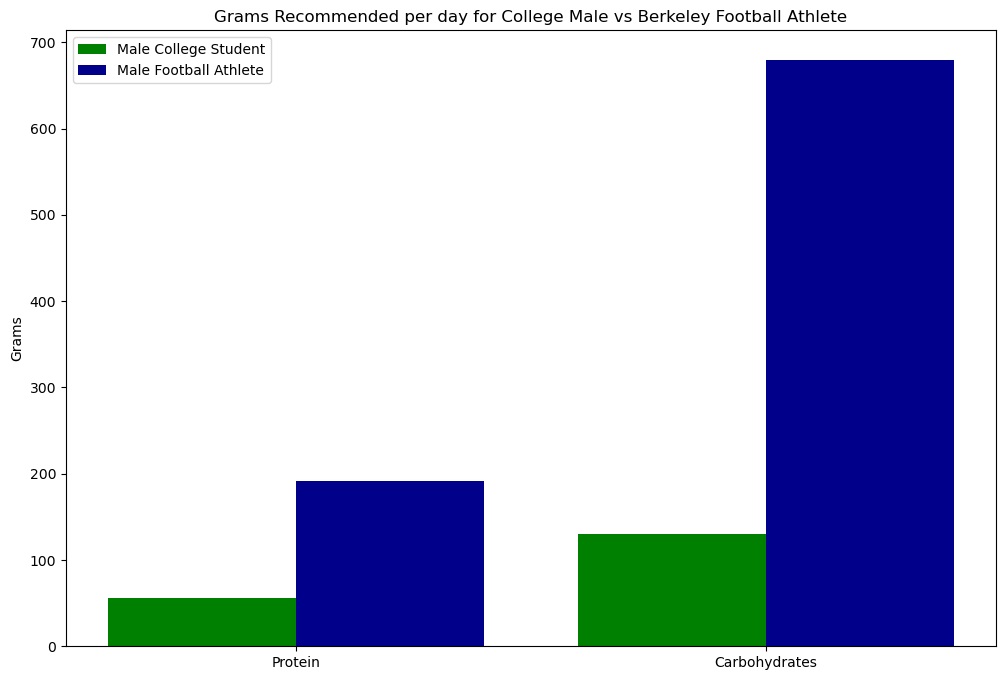

In [28]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

X = ['Protein','Carbohydrates']
reg = df_pcf.loc[:, "Male Student"]
fb = df_pcf.loc[:, "Football Athlete"]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, reg, 0.4, label = 'Protein', color = "green")
plt.bar(X_axis + 0.2, fb, 0.4, label = 'Carbohydrates', color = "darkblue")
  
plt.xticks(X_axis, X)
plt.ylabel("Grams")
plt.title("Grams Recommended per day for College Male vs Berkeley Football Athlete")
plt.legend(["Male College Student", "Male Football Athlete"])
plt.show()